In [1]:
import numpy as np
import matplotlib.pyplot as plt

We will define the same datasets as in Lab5. This way, we have both separable and non-separable cases available.

In [2]:
def generateDataset(n, separable=True):
    m1 = np.array([0., 0.])
    s1 = np.array([[1., -0.9], [-0.9, 1.]])

    if separable:
        m2 = np.array([3., 6.])
        s2 = np.array([[1., 0.], [0., 1.]])
    else:
        m2 = np.array([1., 2.])
        s2 = np.array([[1., 0.], [0., 1.]])

    pos_samples = np.random.multivariate_normal(m1, s1, n)
    neg_samples = np.random.multivariate_normal(m2, s2, n)

    x = np.concatenate((pos_samples, neg_samples)).T
    y = np.concatenate((np.ones(n), -1*np.ones(n)))

    return x,y

Also, we will define the primal problem. Take into account that in the sumatory, only those values that are positive are relevant.

In [3]:
def f(x, y, lamda, w, b):
    sum_value = 1 - y*(np.dot(w.T, x) + b)

    return (lamda/2) * np.dot(w.T, w) + sum_value[sum_value > 0].sum()

# Experiment 1

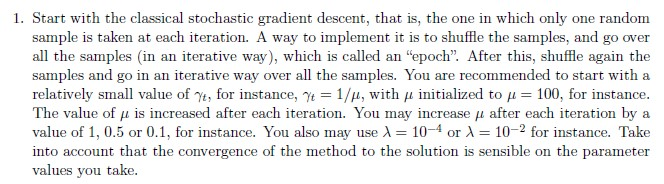

In [4]:
def sgd(x, y, mu=100, mu_increase=0.5, lamda=1e-2, n_epochs=100):
    # Initialize parameters
    w = np.random.rand(x.shape[0])
    b = np.random.rand(1)[0]

    history = []
    epoch = 0
    while epoch < n_epochs:
        # shuffle data
        permutation = np.random.permutation(x.shape[1])
        x = x[:, permutation]
        y = y[permutation]

        # Run epoch
        for i in range(x.shape[1]):
            # Update parameters
            if y[i]*(np.dot(w.T, x[:,i]) + b) > 1:
                w += -(1/mu) * lamda * w
            else:
                w += -(1/mu) * lamda * w + y[i] * x[:,i]
                b += (1/mu) * y[i]

        # Update learning rate
        mu = mu + mu_increase

        # Update epoch
        epoch += 1

        # Store history
        history.append(np.log(f(x, y, lamda, w, b)))
    return w, b, history

Experiment for mu_inc_val = 0.5 and lambda_val = 0.01


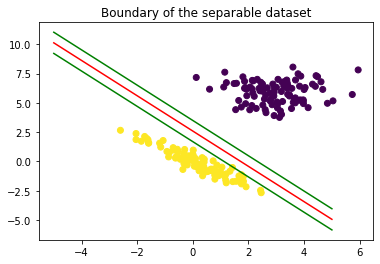

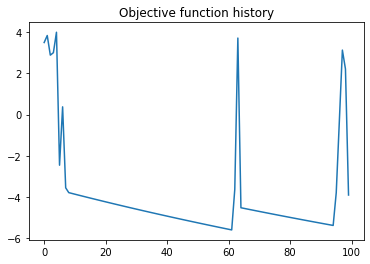

Experiment for mu_inc_val = 0.5 and lambda_val = 0.0001


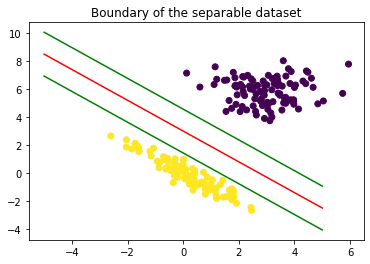

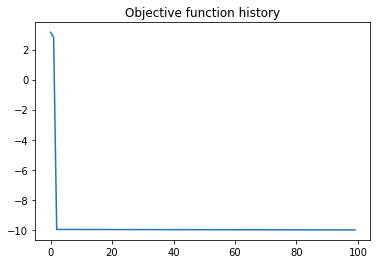

Experiment for mu_inc_val = 0.1 and lambda_val = 0.01


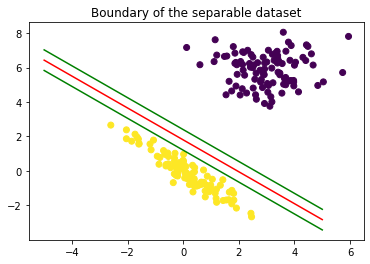

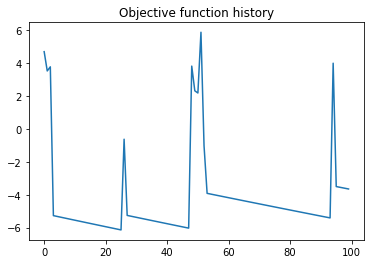

Experiment for mu_inc_val = 0.1 and lambda_val = 0.0001


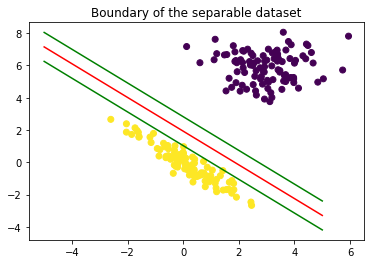

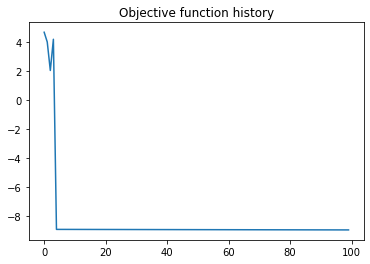

Experiment for mu_inc_val = 1 and lambda_val = 0.01


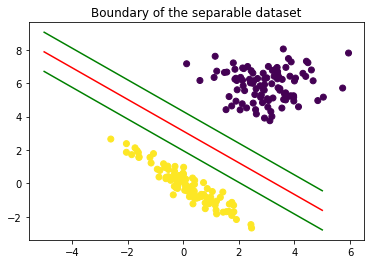

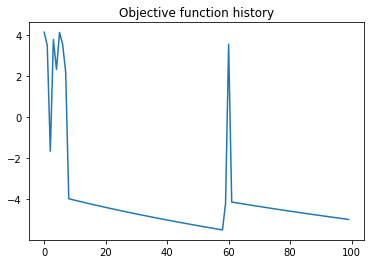

Experiment for mu_inc_val = 1 and lambda_val = 0.0001


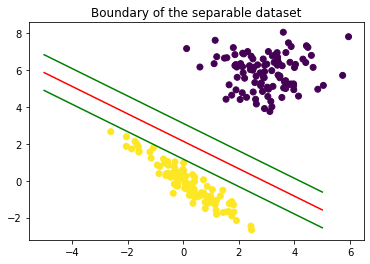

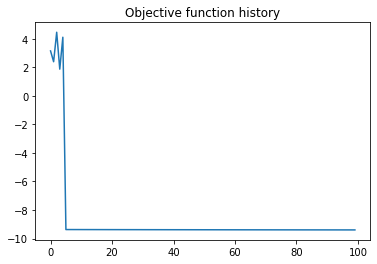

In [6]:
# Generate dataset
X, y = generateDataset(100)

for mu_inc_val in [0.5, 0.1, 1]:
    for lambda_val in [1e-2, 1e-4]:
        print("Experiment for mu_inc_val =", mu_inc_val, "and lambda_val =", lambda_val)
        # Compute w and b using SGD
        w, b, history = sgd(X, y, mu_increase=mu_inc_val, lamda=lambda_val)

        # Plot points, margins and hyperplane
        linespace = np.linspace(-5, 5, 100)

        plt.title("Boundary of the separable dataset")
        plt.scatter(X[0,:], X[1,:], c=y)
        plt.plot(linespace, -(w[0]*linespace + b) / w[1], 'r')
        plt.plot(linespace, -(w[0]*linespace + b+1) / w[1], 'g')
        plt.plot(linespace, -(w[0]*linespace + b-1) / w[1], 'g')
        plt.show()

        plt.title('Objective function history')
        plt.plot(history)
        plt.show()

Always the highest lambda seems to give out a more centered between both classes hyperplanes, as the margin increases. However, it seeems like increasing the mu_increase value tends to give solutions that are a little bit more separated from the classes (considering the margins).

We can also observe that the highest lambda makes the convergence more difficult to obtain. 

# Experiment 2

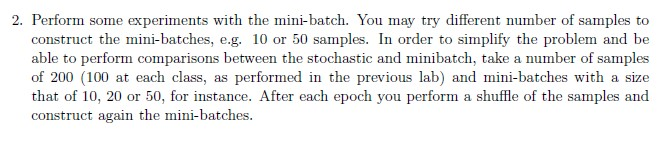

In [8]:
def mbgd(x, y, mu=100, mu_increase=0.5, lamda=1e-2, batch_size=10, n_epochs=100):
    # Initialize parameters
    w = np.random.rand(x.shape[0])
    b = np.random.rand(1)[0]

    n_batch = x.shape[1] // batch_size
    history = []
    epoch = 0
    while epoch < n_epochs:
        # shuffle data
        permutation = np.random.permutation(x.shape[1])
        x = x[:, permutation]
        y = y[permutation]

        # Run epoch
        for i in range(n_batch):
            # Get mini batch
            x_mb = x[:, i*batch_size:(i+1)*batch_size]
            y_mb = y[i*batch_size:(i+1)*batch_size]
            
            # Update parameters
            sum_value_w = np.zeros(w.shape)
            sum_value_b = 0
            for j in range(x_mb.shape[1]):
                if y_mb[j]*(np.dot(w.T, x_mb[:,j]) + b) <= 1:
                    sum_value_w += y_mb[j] * x_mb[:,j]
                    sum_value_b += y_mb[j]

            w += -(1/mu) * lamda * w + (1/mu) * sum_value_w
            b += (1/mu) * sum_value_b

        # Update learning rate
        mu = mu + mu_increase

        # Update epoch
        epoch += 1

        # Store history
        history.append(np.log(f(x, y, lamda, w, b)))
    return w, b, history

Experiment for batch_size= 10 mu_inc_val = 0.5 and lambda_val = 0.01
[-0.35084475 -0.50242823] 1.3558204139805874


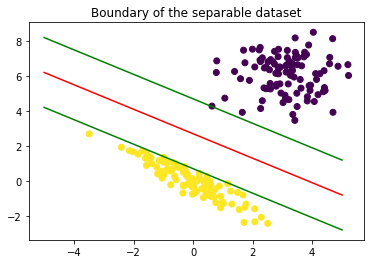

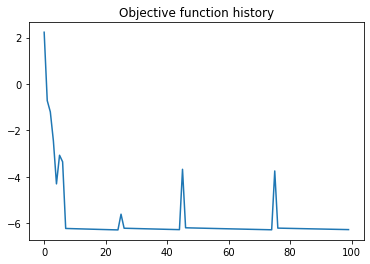

Experiment for batch_size= 20 mu_inc_val = 0.5 and lambda_val = 0.01
[-0.35489238 -0.50835639] 1.3557254805086054


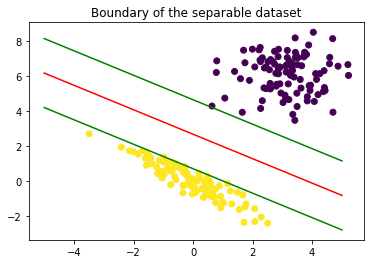

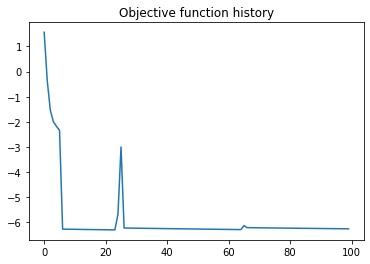

Experiment for batch_size= 50 mu_inc_val = 0.5 and lambda_val = 0.01
[-0.49618506 -0.70316867] 1.4982362261062347


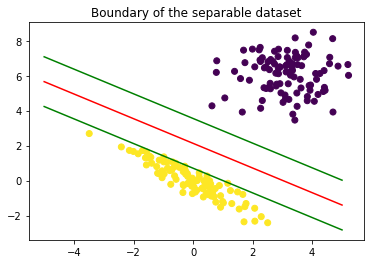

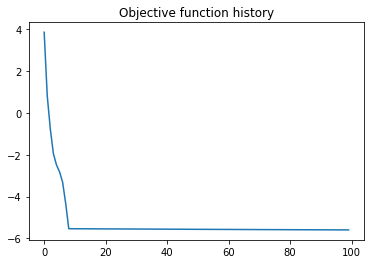

Experiment for batch_size= 10 mu_inc_val = 0.5 and lambda_val = 0.0001
[-0.36131    -0.50599021] 1.3494791436633644


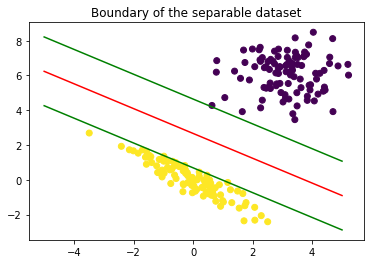

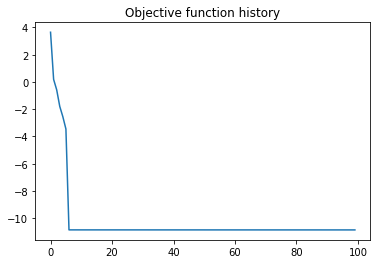

Experiment for batch_size= 20 mu_inc_val = 0.5 and lambda_val = 0.0001
[-0.36456924 -0.52192418] 1.362054227151483


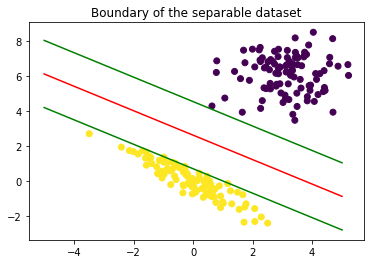

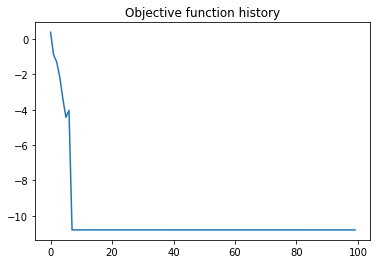

Experiment for batch_size= 50 mu_inc_val = 0.5 and lambda_val = 0.0001
[-0.6573071  -0.91887618] 1.6412124603442415


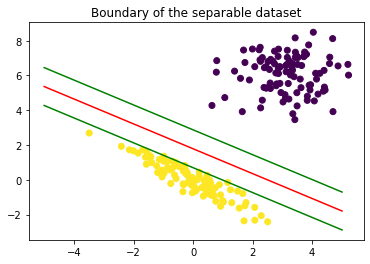

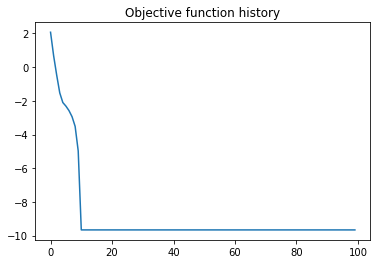

Experiment for batch_size= 10 mu_inc_val = 0.1 and lambda_val = 0.01
[-0.35545928 -0.50734859] 1.3598417453977496


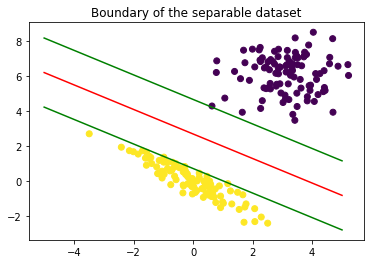

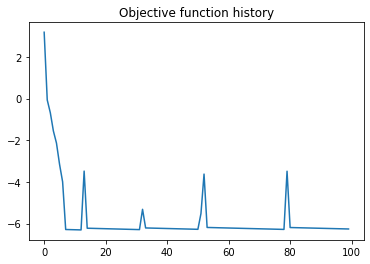

Experiment for batch_size= 20 mu_inc_val = 0.1 and lambda_val = 0.01
[-0.36705139 -0.52241204] 1.3659855019960045


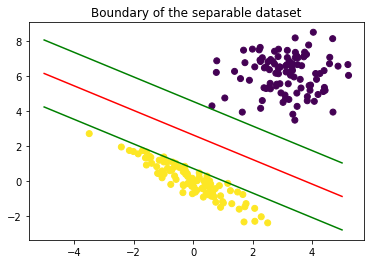

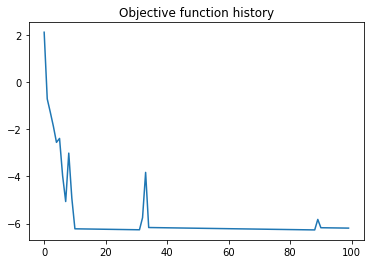

Experiment for batch_size= 50 mu_inc_val = 0.1 and lambda_val = 0.01
[-0.49869186 -0.69691901] 1.4966556077640605


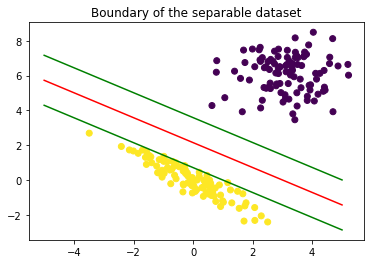

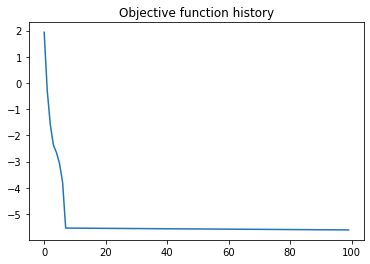

Experiment for batch_size= 10 mu_inc_val = 0.1 and lambda_val = 0.0001
[-0.36147152 -0.50582228] 1.347260168286184


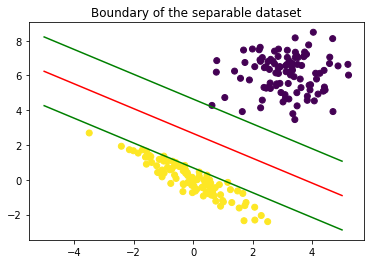

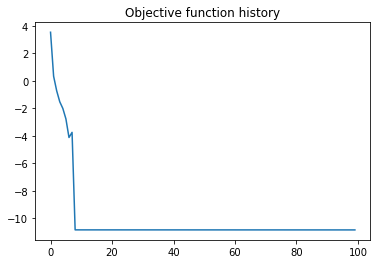

Experiment for batch_size= 20 mu_inc_val = 0.1 and lambda_val = 0.0001
[-0.36618501 -0.50554025] 1.3523789782198121


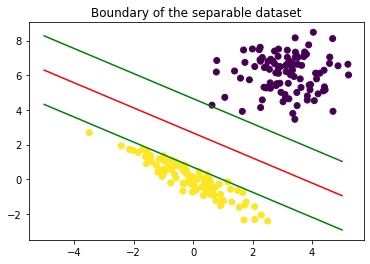

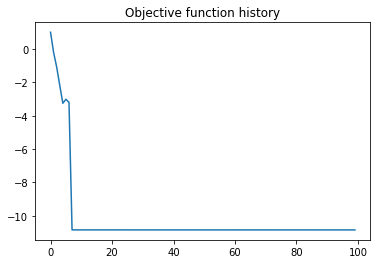

Experiment for batch_size= 50 mu_inc_val = 0.1 and lambda_val = 0.0001
[-0.54178209 -0.75757188] 1.5199787614185758


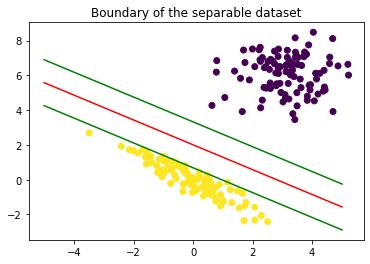

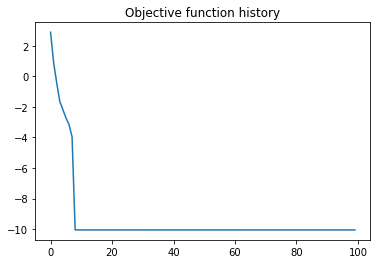

Experiment for batch_size= 10 mu_inc_val = 1 and lambda_val = 0.01
[-0.35563566 -0.50201148] 1.356553361983837


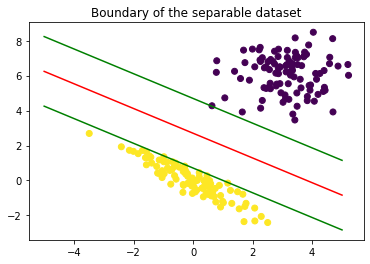

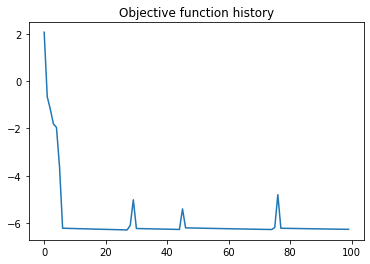

Experiment for batch_size= 20 mu_inc_val = 1 and lambda_val = 0.01
[-0.37654534 -0.52104346] 1.404262017597267


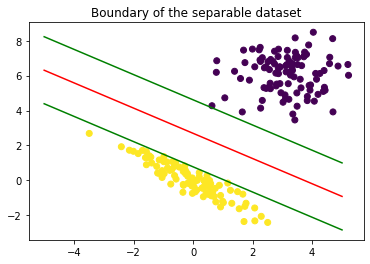

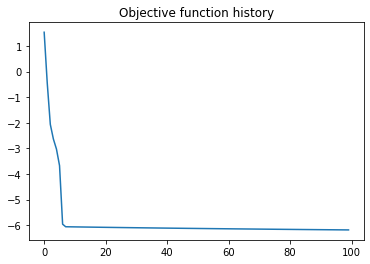

Experiment for batch_size= 50 mu_inc_val = 1 and lambda_val = 0.01
[-0.40611188 -0.55317557] 1.3991347595406252


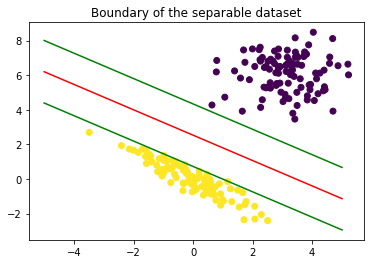

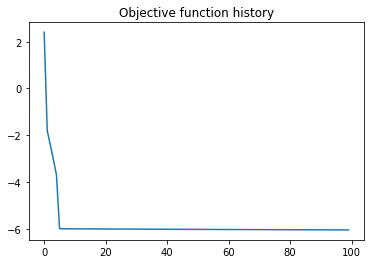

Experiment for batch_size= 10 mu_inc_val = 1 and lambda_val = 0.0001
[-0.34769018 -0.50248243] 1.3434923588424608


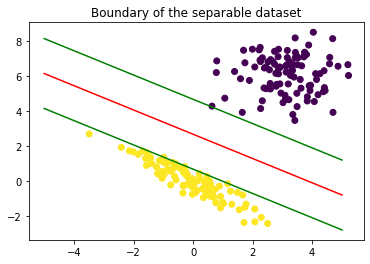

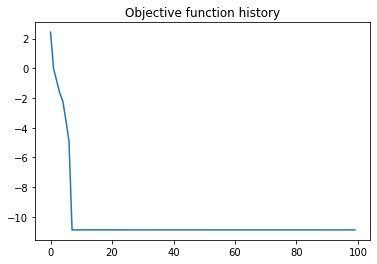

Experiment for batch_size= 20 mu_inc_val = 1 and lambda_val = 0.0001
[-0.36156377 -0.50200092] 1.3460976190489253


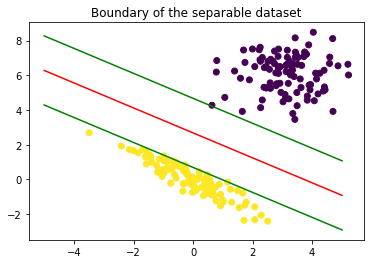

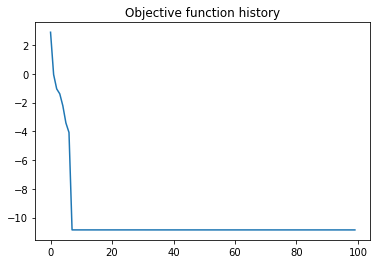

Experiment for batch_size= 50 mu_inc_val = 1 and lambda_val = 0.0001
[-0.35231293 -0.5070185 ] 1.3436432720552713


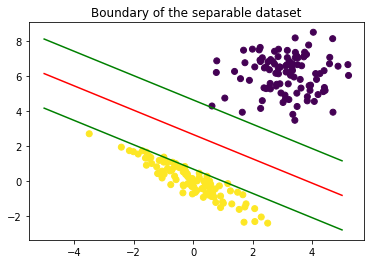

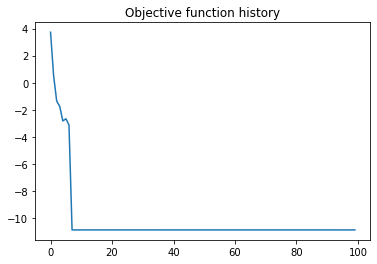

In [13]:
# Generate dataset
X, y = generateDataset(100)

for mu_inc_val in [0.5, 0.1, 1]:
    for lambda_val in [1e-2, 1e-4]:
        for batch_size_val in [10, 20, 50]:
            print("Experiment for batch_size=", batch_size_val, "mu_inc_val =", mu_inc_val, "and lambda_val =", lambda_val)

            # Compute w and b using MBGD
            w, b, history = mbgd(X, y, mu_increase=mu_inc_val, lamda=lambda_val, batch_size=batch_size_val)
            print(w,b)

            # Plot points, margins and hyperplane
            linespace = np.linspace(-5, 5, 100)

            plt.title("Boundary of the separable dataset")
            plt.scatter(X[0,:], X[1,:], c=y)
            plt.plot(linespace, -(w[0]*linespace + b) / w[1], 'r')
            plt.plot(linespace, -(w[0]*linespace + b+1) / w[1], 'g')
            plt.plot(linespace, -(w[0]*linespace + b-1) / w[1], 'g')
            plt.show()

            plt.title('Objective function history')
            plt.plot(history)
            plt.show()

Changing the batch size does not affect the result much, but now we obtain similar and optimal solutions for almost all configurations. Those scenarios where the solution might be improved are:


· batch_size = 50, mu_inc_val = 0.1 and lambda_val = 0.0001

· batch_size = 50, mu_inc_val = 0.1 and lambda_val = 0.01

· batch_size = 50, mu_inc_val = 0.5 and lambda_val = 0.0001


In all of the cases, the batch_size is bigger and the lambda is lower (or larger but with lower mu increment).

# Experiment 3

You can check the plots of the logarithm of the objective function in the outputs of the past experiments, as the gd functions already generated the history.

It is apparent that both increasing the batch_size and a lower lambda provoke faster rates of convergence in the minimization.